In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# **Data Exploration**



Importing dependencies and reading the CSVs

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
samp_submission = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')

Looking at the structures

**First Look:**

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
samp_submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


### **Understanding the Variables**

f(x) = y
> f(PassengerId, HomePlanet, CyroSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name) = Transported

It is a multi-variate analysis.

In [6]:
samp_submission.dtypes

PassengerId    object
Transported      bool
dtype: object

## **Exploratory Data Analysis**

In [7]:
print(f'The shape of the training data is:{train.shape}')
print(f'\nThe shape of the testing data is:{test.shape}')
print(f'\nThe shape of the sample submission data is:{samp_submission.shape}')

The shape of the training data is:(8693, 14)

The shape of the testing data is:(4277, 13)

The shape of the sample submission data is:(4277, 2)


In [8]:
print(f'Percentage of null values in each feature:')
train.isnull().mean()*100

Percentage of null values in each feature:


PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

#### Since the null values are **under 5%**, we can safely **dispose** of them.

No need of imputing.

**No need of:**
> from sklearn.impute import SimpleImputer

In [9]:
train.dropna(inplace = True)

In [10]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [11]:
train.shape

(6606, 14)

In [12]:
print(f'The number of rows removed from the training dataset is {8693-6606}')

The number of rows removed from the training dataset is 2087


### **Now, lets look at the data types of the features**

In [13]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Lets create two variables:**

* Non-Categorical Data
* Categorical Data

This way, it is easier to work with.

In [14]:
non_categorical_data = train.select_dtypes(exclude='object')
non_categorical_data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False
8689,18.0,0.0,0.0,0.0,0.0,0.0,False
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False


In [15]:
categorical_data = train.select_dtypes(include='object')
categorical_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines
...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre


**Let's look at the number of unique values in the Categorical Features:**

In [16]:
categorical_data.nunique()

PassengerId    6606
HomePlanet        3
CryoSleep         2
Cabin          5305
Destination       3
VIP               2
Name           6590
dtype: int64

We can safely dispose of the following features:
* Cabin: Firstly because it has a lot of unique values and secondly, it makes no sense for it to have any correlation with the y feature.
* Name: Since it has no importance with whether or not they are transported or not.

In [17]:
train.drop(columns=['Cabin', 'Name'], axis=1, inplace=True)

In [18]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [19]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,28.894036,222.991674,478.958523,178.356494,313.161520,303.780048
std,14.533429,644.987936,1678.592291,576.328407,1144.016291,1127.142166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,82.750000,30.000000,65.000000,52.000000
max,79.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

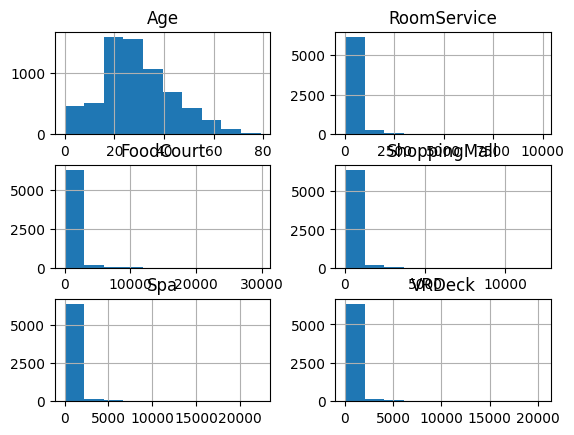

In [20]:
non_categorical_data.hist()

**Note to self:** Need to scale these features.

# **Some Data Visualizations**

<Axes: xlabel='RoomService', ylabel='FoodCourt'>

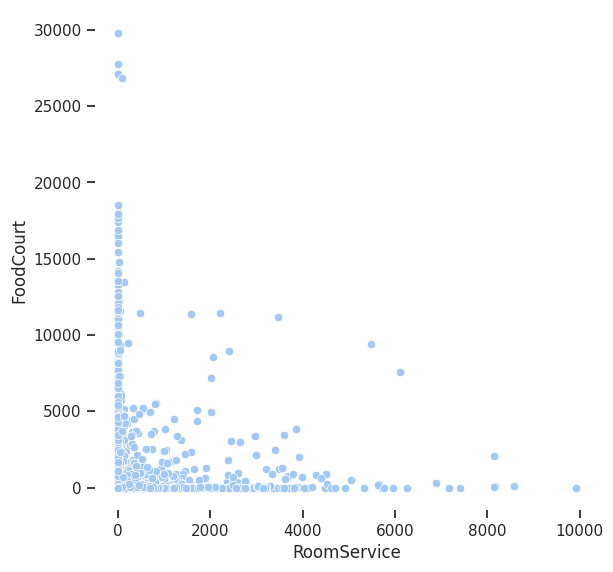

In [21]:
sns.set_theme(style='ticks', palette='pastel')
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x=train.RoomService, y=train.FoodCourt)

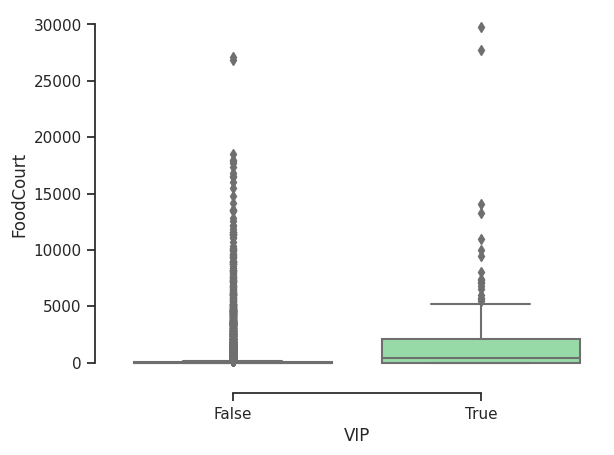

In [22]:
sns.set_theme(style='ticks', palette='pastel')
sns.boxplot(data=train, x='VIP', y='FoodCourt', palette=['m', 'g'])
sns.despine(offset=10, trim=True)

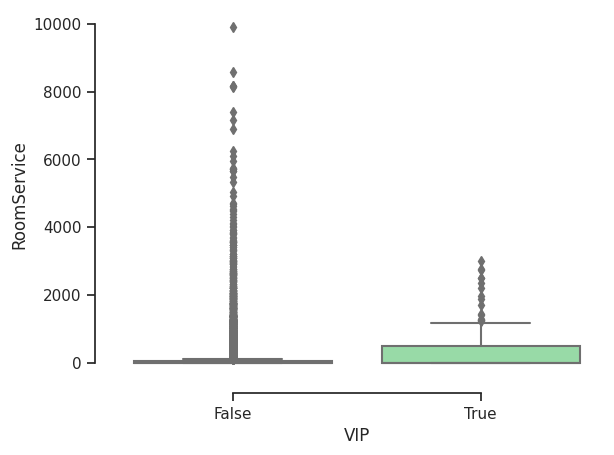

In [23]:
sns.set_theme(style='ticks', palette='pastel')
sns.boxplot(data=train, x='VIP', y='RoomService', palette=['m', 'g'])
sns.despine(offset=10, trim=True)

### **Explanation of what I'm trying to do here:**
* Find coorelations between different features
* Trying to see if any status of the passengers are making them more likely to be transported
* Trying to see if being in and/or using some facilities somewhere is making them more likely to be transported

In [24]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


<Axes: xlabel='RoomService', ylabel='FoodCourt'>

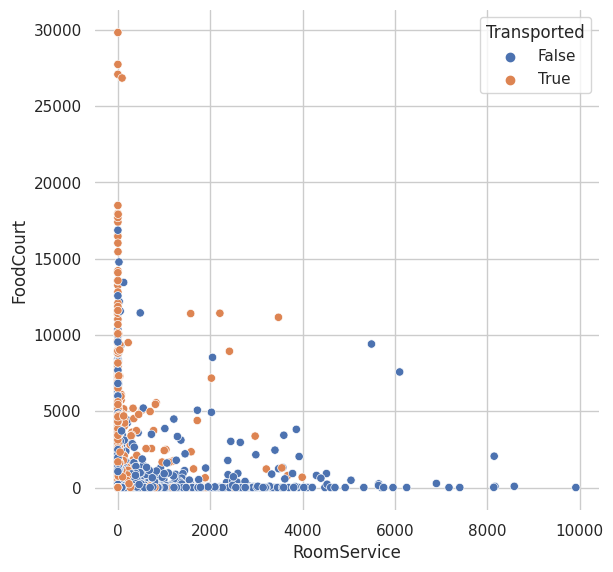

In [32]:
sns.set_theme(style='whitegrid')
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x=train.RoomService, y=train.FoodCourt, hue=train.Transported)

#### **Look! We found something interesting**

It **looks** like people who spent money at the food court were **MORE** likely to get **transported!**

Wonder why...

Possible explanations:
* The spaceship crashed open on the FoodCourt side
* People from FoodCourt were headed towards the direction of the crash-touch

<Axes: xlabel='RoomService', ylabel='ShoppingMall'>

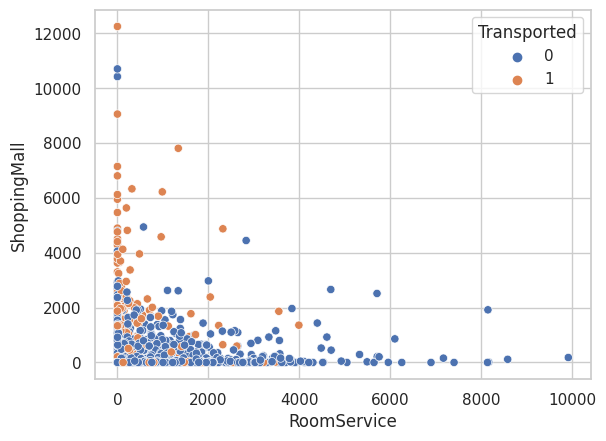

In [47]:
sns.scatterplot(x=train.RoomService, y=train.ShoppingMall, hue=train.Transported)

#### Looks like **people** who **did spent a lot on shopping** also were **more likely** to get **transported**.


Possible explanations:
* Shopping Mall near crash-touch part of the spaceship.
* Shopping Mall beside/nearby Food Court, for which we also saw a high likelihood.

<Axes: xlabel='RoomService', ylabel='FoodCourt'>

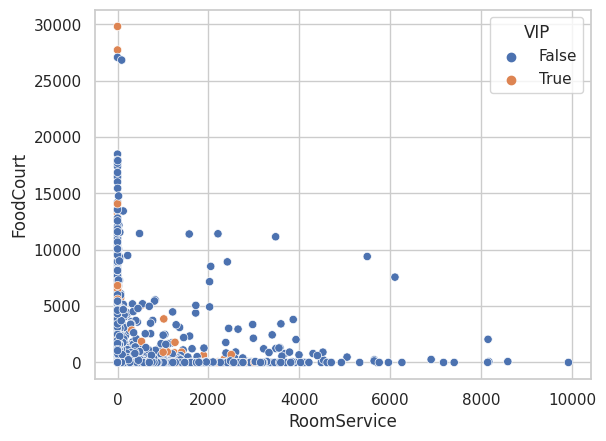

In [34]:
sns.scatterplot(x=train.RoomService, y=train.FoodCourt, hue=train.VIP)

No correlation between using these features while being a VIP and getting transported.

#### **Lets dummy impute the "Transported" columns for more interesting visualizations and findings**

In [35]:
train['Transported'] = train.Transported.apply(lambda x:0 if x == False else 1)

In [36]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1


Looks good.

<Axes: xlabel='Transported', ylabel='count'>

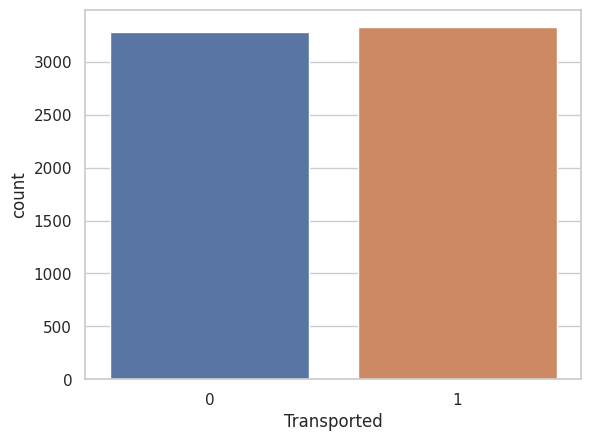

In [41]:
sns.countplot(x=train.Transported)

<Axes: xlabel='HomePlanet', ylabel='RoomService'>

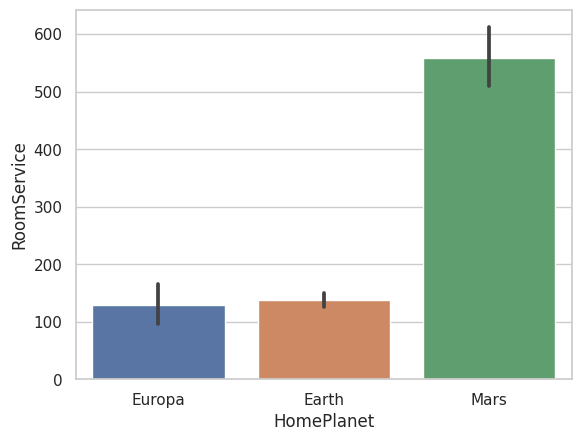

In [43]:
sns.barplot(x=train.HomePlanet, y=train.RoomService)

#### Wonder why **Marians** spent the most on Room Service, are they **rich?!**

<Axes: xlabel='HomePlanet', ylabel='FoodCourt'>

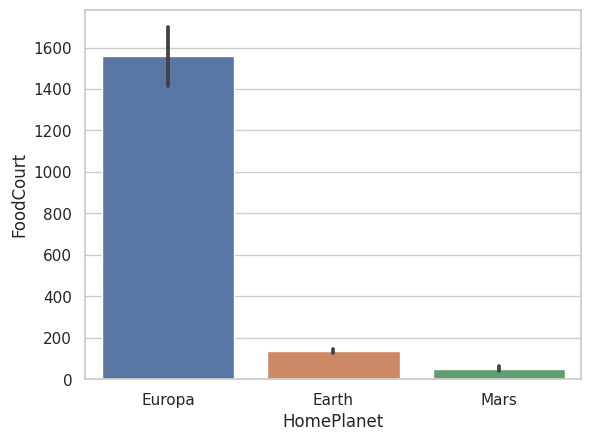

In [44]:
sns.barplot(x=train.HomePlanet, y=train.FoodCourt)

#### Woah. **Europa-occupants** must have an **extremely fast metabolism**. 

> Interesting findings indeed.

<Axes: xlabel='HomePlanet', ylabel='Transported'>

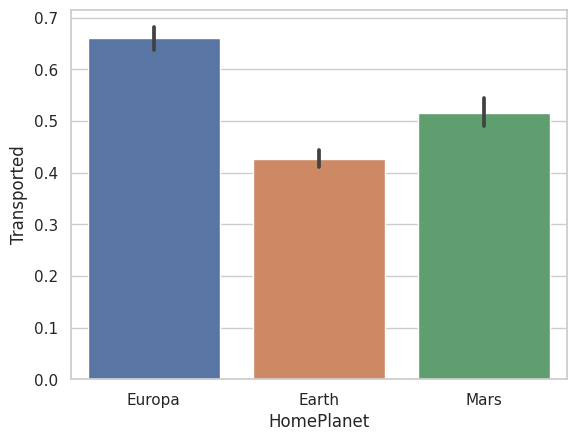

In [45]:
sns.barplot(x=train.HomePlanet, y=train.Transported)

##### **Europa** seems to be leading with the **transported numbers**. 

Poor **Europa-ns**.

<Axes: xlabel='HomePlanet', ylabel='Transported'>

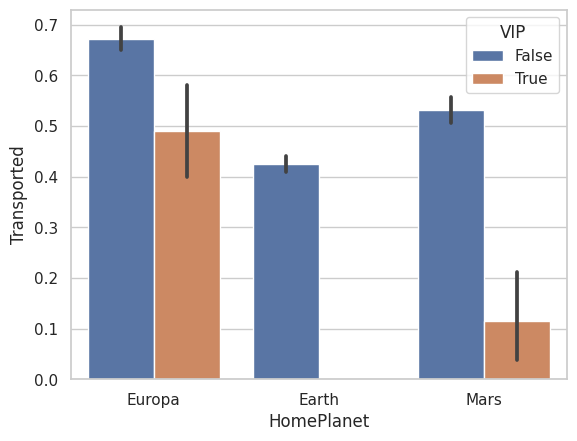

In [46]:
sns.barplot(x=train.HomePlanet, y=train.Transported, hue=train.VIP)

Okay. Not all **VIPs** were transported.

# **Creation of the Pipeline**

Time for some column transformations and changes.

#### We do not really need **'PassengerId'** as it has no importance to our target value. We can safely dispose of it.

In [48]:
train = train.drop(columns=['PassengerId'], axis=1)

In [49]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1


In [51]:
train.dtypes

HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int64
dtype: object

#### **Lets start with some Column Transformations**

Here is how we are going to go:
* Transform the categorical columns with OHE
* Scale the numerical columns
* Apply model
* Test accuracy

##### **First, lets define the categorical features and numerical features:**

But first, lets look at the number of unique values in each of these categorical features

In [82]:
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for i in categorical_features:
    print(f'The number of unique values in {i}: {train[i].nunique()}')

The number of unique values in HomePlanet: 3
The number of unique values in CryoSleep: 2
The number of unique values in Destination: 3
The number of unique values in VIP: 2


#### **Okay, looks like they are One Hot Encoding feasible.**

In [84]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_transformer = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

#### **Now, we will scale the numerical columns.**

Create a transformer for the numerical columns.

Standard scaling.

In [85]:
from sklearn.preprocessing import StandardScaler

numerical_transformer = StandardScaler()

Now lets list all the numerical features we want to scale:

In [86]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1


In [87]:
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

### **Now we bundle them!**

In [88]:
preprocessor = ColumnTransformer(transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)])

# **Logistic Regression**

First, we will try out logistic regression and see how it works.

In [90]:
from sklearn.linear_model import LogisticRegression

lgr_clf = LogisticRegression(random_state=1)

### **Lets create our first Pipeline for Logistic Regression**

Pipeline manual:
* The 'preprocessor' step basically does what we previously describe the 'preprocessor' variable to do i.e. Column Transformations
* The 'model' step fits the model onto the dataset after preprocessing.

In [91]:
pipeline_lgr = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', lgr_clf)])

##### **Now we split the training data into X and Y, to test predictions.**

In [92]:
X_train = train.iloc[:,0:10]
y_train = train.iloc[:, -1]

In [94]:
X_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


In [95]:
pipeline_lgr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['HomePlanet', 'CryoSleep',
                                                   'Destination', 'VIP']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck'])])),
                ('model', LogisticRegression(random_state=1))])

## **Test Dataset Imputations**

Now lets fix the features on the test dataset

In [96]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [99]:
test.isnull().mean()*100

PassengerId     0.000000
HomePlanet      2.034136
CryoSleep       2.174421
Cabin           2.338087
Destination     2.151040
Age             2.127660
VIP             2.174421
RoomService     1.917232
FoodCourt       2.478373
ShoppingMall    2.291326
Spa             2.361468
VRDeck          1.870470
Name            2.197802
dtype: float64

## **Imputation guide:**

* **Numerical Imputations:** Mean
* **Categorical Imputations :** Mode

In [117]:
from sklearn.impute import SimpleImputer

for column in numerical_features:
    test[column] = test[column].fillna(test[column].mean())
    
test['HomePlanet']= test.HomePlanet.fillna('Earth')
test['CryoSleep']= test.CryoSleep.fillna('False')
test['Destination']= test.Destination.fillna('TRAPPIST-1e')
test['VIP']= test.VIP.fillna('False')

In [118]:
test.isnull().mean()*100

PassengerId     0.000000
HomePlanet      0.000000
CryoSleep       0.000000
Cabin           2.338087
Destination     0.000000
Age             0.000000
VIP             0.000000
RoomService     0.000000
FoodCourt       0.000000
ShoppingMall    0.000000
Spa             0.000000
VRDeck          0.000000
Name            2.197802
dtype: float64

We almost forgot to drop 'Cabin' and 'Name' from the test dataset!

In [119]:
test = test.drop(columns=['Name', 'Cabin'], axis=1)
test

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0
4273,9269_01,Earth,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0
4274,9271_01,Mars,True,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0
4275,9273_01,Europa,False,TRAPPIST-1e,28.658146,False,0.0,2680.0,0.0,0.0,523.0


In [120]:
test.isnull().mean()*100

PassengerId     0.0
HomePlanet      0.0
CryoSleep       0.0
Destination     0.0
Age             0.0
VIP             0.0
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

## Now we are ready for predictions!

Drop the PassengerId while predicting because it wasn't in the training set:-

In [122]:
X = test.iloc[:,1:]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0
4273,9269_01,Earth,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0
4274,9271_01,Mars,True,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0
4275,9273_01,Europa,False,TRAPPIST-1e,28.658146,False,0.0,2680.0,0.0,0.0,523.0


In [124]:
preds_lgr = pipeline_lgr.predict(X)

## **Submission**

Lets output the submission now

In [126]:
output_lgr = pd.DataFrame({'PassengerId':test.PassengerId, 'Transported': preds_lgr})

In [127]:
output_lgr.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0


In [128]:
output_lgr['Transported'] = output_lgr.Transported.apply(lambda x: True if x==1 else False)
output_lgr.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [130]:
output_lgr.to_csv('submission_lgr.csv', index=False)
pd.read_csv('submission_lgr.csv').shape

(4277, 2)

### **Logistic Regression Done!**

**Score:** 0.78863

**Current Rank:** 1519